# Titanic Survival dataset 

In [3]:
# import libraries
# For data loading and manipulation
import pandas as pd
# For maths calculations
import numpy as np
# For exploratory data analysis (EDA)
import pandas_profiling
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For splitting data into train set and test set
from sklearn.model_selection import train_test_split

# Classification Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Hyperparameter Tuning
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
# Hyperparameter Tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

# For evaluating various metrics 
from sklearn.model_selection import cross_val_score

# For ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve


# Exporting and importing a trained model
from joblib import dump, load
import pickle

In [4]:
dataset = pd.read_csv('train.csv')

In [6]:
pandas_profiling.ProfileReport(dataset)

c:\users\hp\anaconda3\envs\newml\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [7]:
dataset.head()
len(dataset)
type(dataset)
dataset.shape
dataset.index
dataset.head()
dataset.columns
dataset.dtypes
dataset.info()
dataset.describe()
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [8]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [9]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# looking for correlation

corr_matrix = dataset.corr()
corr_matrix["Survived"].sort_values(ascending = False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [11]:
# dataset.plot(kind="scatter", x="Fare", y="Survived", alpha=0.8)

In [12]:
len(dataset)

891

In [13]:
type(dataset)

pandas.core.frame.DataFrame

In [14]:
dataset.index

RangeIndex(start=0, stop=891, step=1)

In [15]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
dataset.shape

(891, 12)

In [18]:
# count the number of NaN values in each column
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#dataset.head(20)
# drop na values (delete rows)
dataset.dropna(inplace = True, axis = 0) 

In [20]:

dataset.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [21]:
dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200

In [22]:
# compare target with Sex columns  male = 0 , Female = 1
pd.crosstab(dataset.Survived, dataset.Sex)


Sex       female  male
Survived              
0              6    54
1             82    41

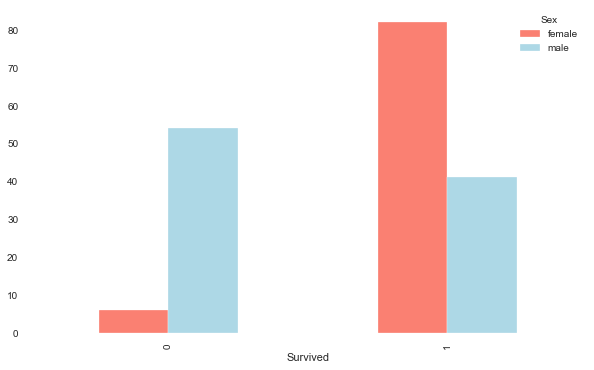

In [23]:
# Create a plot
pd.crosstab(dataset.Survived, dataset.Sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);

In [48]:
dataset = dataset.drop(['PassengerId', 'Name', 'SibSp', 'Parch','Ticket',
   'Cabin'], axis = 1)

In [62]:
dataset = pd.get_dummies(dataset,drop_first=True)
print(dataset)

     Survived  Pclass   Age     Fare  Sex_male  Embarked_Q  Embarked_S
1           1       1  38.0  71.2833         0           0           0
3           1       1  35.0  53.1000         0           0           1
6           0       1  54.0  51.8625         1           0           1
10          1       3   4.0  16.7000         0           0           1
11          1       1  58.0  26.5500         0           0           1
..        ...     ...   ...      ...       ...         ...         ...
871         1       1  47.0  52.5542         0           0           1
872         0       1  33.0   5.0000         1           0           1
879         1       1  56.0  83.1583         0           0           0
887         1       1  19.0  30.0000         0           0           1
889         1       1  26.0  30.0000         1           0           0

[183 rows x 7 columns]


In [63]:
# creating X and y
X = dataset.drop('Survived', axis = 1)
y = dataset.Survived

In [64]:
type(X)

pandas.core.frame.DataFrame

In [65]:
type(y)

pandas.core.series.Series

In [66]:

y.value_counts()

1    123
0     60
Name: Survived, dtype: int64

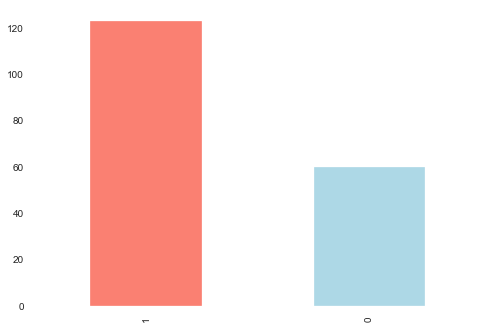

In [67]:
y.value_counts().plot(kind = "bar", color = ["salmon", "lightblue"])

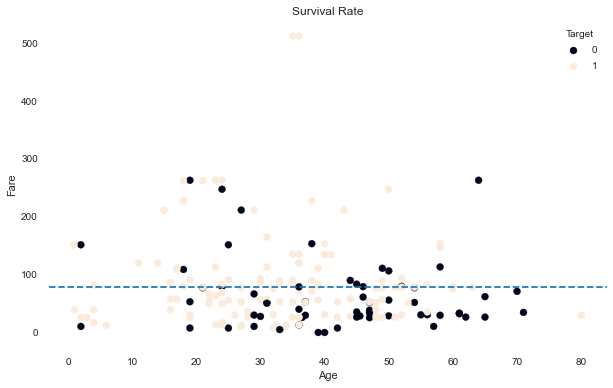

In [68]:

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(dataset["Age"], 
                     dataset["Fare"], 
                     c=dataset["Survived"])

# Customize the plot
ax.set(title="Survival Rate",
       xlabel="Age",
       ylabel="Fare");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(dataset["Fare"].mean(),
           linestyle="--");

In [69]:
# spliting dataset into training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [70]:
# dropping na values
X_train.isnull().sum()

Pclass        0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [71]:
# View different shape of training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((137, 6), (46, 6), (137,), (46,))

In [72]:
# Building Model
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Instantiate an instance of RandomForestClassifier as classifier
classifier_rf = RandomForestClassifier()

In [74]:
# We'll leave the hyperparameters as default to begin with...
classifier_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
# fitting the model
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
X_train.shape

(137, 6)

In [77]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_pred

y_pred = classifier_rf.predict(X_test)

In [78]:
# Evaluate the fitted model on the training set using score() function
classifier_rf.score(X_train, y_train)

1.0

In [79]:
# Evaluate the fitted model on the testing set using score()
classifier_rf.score(X_test,y_test)

0.6956521739130435

In [80]:
# hyperparameter tuning for RandomForestClassifier
# n_estimations : means number of decision tree

for i in range(10,100,10):
    print(f"trying model with {i} estimators...")
    model = RandomForestClassifier(n_estimators = i, random_state = 42).fit(X_train, y_train)
    print(f"model accuracy on test set : {model.score(X_test, y_test):.2f}")
   # print(f"cross-validation score : {np.mean(cross_val_score(model, X, y, cv = 5)) * 100:.2f}")
    print("")
    
    

trying model with 10 estimators...
model accuracy on test set : 0.76

trying model with 20 estimators...
model accuracy on test set : 0.72

trying model with 30 estimators...
model accuracy on test set : 0.72

trying model with 40 estimators...
model accuracy on test set : 0.72

trying model with 50 estimators...
model accuracy on test set : 0.70

trying model with 60 estimators...
model accuracy on test set : 0.72

trying model with 70 estimators...
model accuracy on test set : 0.67

trying model with 80 estimators...
model accuracy on test set : 0.67

trying model with 90 estimators...
model accuracy on test set : 0.70



# Experimenting with differnt classification Algorithms

In [81]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


models = {"LinearSVC" : LinearSVC(),
         "KNN" : KNeighborsClassifier(),
         "LogisticRegression" : LogisticRegression(),
         "RandomForestClassifier" : RandomForestClassifier()}

In [82]:
# created empty dictionary results to store the results
results = {}

In [83]:
# Loop through the models dictionary items, 
## fitting the model on the training data
# and appending the model name and model score on the test data 
# to the results dictionary

# for getting same results across the multiple times execution code
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = ((model.score(X_test, y_test)) * 100)
    

c:\users\hp\anaconda3\envs\newml\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [84]:
results

{'LinearSVC': 71.73913043478261,
 'KNN': 63.04347826086957,
 'LogisticRegression': 73.91304347826086,
 'RandomForestClassifier': 67.3913043478261}

In [85]:
# make our results a little more Visual

# Create a pandas dataframe with the data as the values of the results dictionary,
# the index as the keys of the results dictionary and a single column called accuracy.
# Be sure to save the dataframe to a variable.

results_df = pd.DataFrame(results.values(),
                         results.keys(),
                         columns = ['Accuracy'])

results_df

Accuracy
LinearSVC               71.739130
KNN                     63.043478
LogisticRegression      73.913043
RandomForestClassifier  67.391304

In [86]:
results_df.shape

(4, 1)

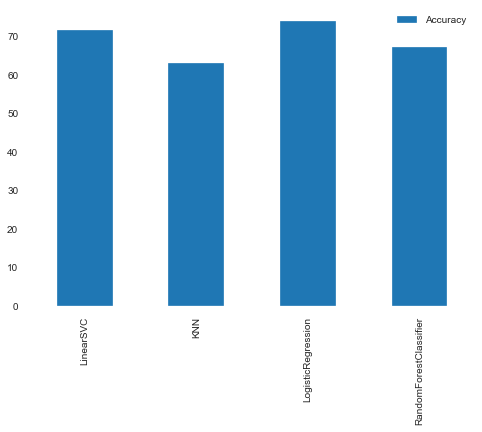

In [87]:
# create bar plot of the results dataframe using plot.bar

results_df.plot.bar()

results in the RandomForestClassifier model perfoming the best 

RandomForestClassifier has highest accuracy : 87 %


let's first build model using RandomForestClassifier by tuning its parameters

and then go for second highest accuracy : Logistic Regression 

let's try second highest accuracy model LogisticRegression  

LogisticRegression  has second highest accuracy : 85 %

results in the LogisticRegression model perfoming the better 

Let's tune its hyperparameters and see if we can improve it.
 
use one of them while parameter tuning
 
    1) Exhaustively with GridSearchCV or

    2) Randomly with RandomizedSearchCV.

In [88]:
# Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [89]:
# let's take a look on parameters of RandomForestClassifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

 Define parameters to search over
 
 only this thing (param_grid) will be change according to algorithms
 
 we have to define hyper parameter as per provided by specific algorithms



In [90]:
# Define parameters to search over
param_grid = {"n_estimators" : [i for i in range(10,100,10)]}

# setup the gridsearch

grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                   param_grid = param_grid,
                   cv = 5)

In [91]:
# fit grid to data
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [92]:
# find the best parameters
grid.best_params_

{'n_estimators': 20}

we get the best result when we create 10 decision trees in RandomForestClassifier Algorithm.

In [93]:
# set  the model to the best estimator
classifier = grid.best_estimator_

In [94]:
classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [95]:
# fit the best model
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

1.0

In [96]:
# Find best model score using test set
classifier.score(X_test, y_test)

0.717391304347826

we are successfully improved 1% accuracy by tuning hyper-parameters 

RandomForestClassifier Accuracy before tuning : 87 %

RandomForestClassifier Accuracy After tuning : 88 %
    

# hyperparameter tuning using RandomizedSearchCV

In [97]:
# different LogisticRegression hyperprarameters
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}



from sklearn.model_selection import RandomizedSearchCV
# Setup an instance of RandomizedSearchCV 
# with a LogisticRegression() estimator,
# our log_reg_grid as the param_distributions, a cv of 5 
# and n_iter of 5.
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 5,
                                verbose = 1)



In [98]:
# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'C': a...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+

In [99]:
# finding the best parameters of RandomizedSeachCV using instance the best_params_

rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [100]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.717391304347826

In [101]:
# Instantiate a LogisticRegression classifier using  
# the best hyperparameters from RandomizedSearchCV

classifier_log_reg = LogisticRegression(solver = "liblinear", C = 206.913808111479)

In [102]:
# Fit the new instance of LogisticRegression with 
# the best hyperparameters on the training data 
classifier_log_reg.fit(X_train, y_train)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [103]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve


In [104]:
# make predictions on test data and save them
y_pred = classifier_log_reg.predict(X_test)

In [105]:
# return probrabilities rather than labels
classifier_log_reg.predict_proba(X_test)

array([[0.31505035, 0.68494965],
       [0.17312898, 0.82687102],
       [0.01943203, 0.98056797],
       [0.48675064, 0.51324936],
       [0.64754244, 0.35245756],
       [0.62782455, 0.37217545],
       [0.32245134, 0.67754866],
       [0.03354733, 0.96645267],
       [0.06329773, 0.93670227],
       [0.68991709, 0.31008291],
       [0.54398165, 0.45601835],
       [0.08485035, 0.91514965],
       [0.6298094 , 0.3701906 ],
       [0.0321787 , 0.9678213 ],
       [0.67030906, 0.32969094],
       [0.31733347, 0.68266653],
       [0.01907744, 0.98092256],
       [0.42432175, 0.57567825],
       [0.82898701, 0.17101299],
       [0.01803822, 0.98196178],
       [0.0679216 , 0.9320784 ],
       [0.06371263, 0.93628737],
       [0.61136859, 0.38863141],
       [0.51224603, 0.48775397],
       [0.58830681, 0.41169319],
       [0.05058445, 0.94941555],
       [0.0506693 , 0.9493307 ],
       [0.64141757, 0.35858243],
       [0.0901672 , 0.9098328 ],
       [0.04092082, 0.95907918],
       [0.

In [106]:
# compare predict() and predict_proba
# taking only first 5 entries

classifier_log_reg.predict(X_test[:5])


array([1, 1, 1, 1, 0], dtype=int64)

In [107]:
classifier_log_reg.predict_proba(X_test[:5])

array([[0.31505035, 0.68494965],
       [0.17312898, 0.82687102],
       [0.01943203, 0.98056797],
       [0.48675064, 0.51324936],
       [0.64754244, 0.35245756]])

In [108]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  6],
       [ 7, 21]], dtype=int64)

In [109]:
y_test.value_counts()

1    28
0    18
Name: Survived, dtype: int64

In [110]:
# import seaborn for improving visualisation of confusion_matrix
import seaborn as sns


In [111]:
# make confusion matrix more visual
def plot_conf_mat(y_test, y_pred):
    """plots confusion matrix using seaborn's heatmap"""
    
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                    annot = True, # Anotate the boxes
                     fmt = "d", # digit
                    cbar = False)
    
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
    # Fix the broken annotations (this happened in Matplotlib 3.1.1)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

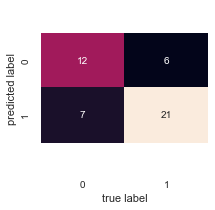

In [112]:
# call plot_conf_mat function
plot_conf_mat(y_test, y_pred)

In [113]:
# classification report
classification_report(y_test, y_pred)
# make classification report more visual
class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict = True))
class_report

0          1  accuracy  macro avg  weighted avg
precision   0.631579   0.777778  0.717391   0.704678      0.720570
recall      0.666667   0.750000  0.717391   0.708333      0.717391
f1-score    0.648649   0.763636  0.717391   0.706143      0.718641
support    18.000000  28.000000  0.717391  46.000000     46.000000

In [114]:
# precision score
precision_score(y_test, y_pred)

0.7777777777777778

In [115]:
# recall score
recall_score(y_test, y_pred)

0.75

In [116]:
# F1 score
f1_score(y_test, y_pred)

0.7636363636363638

# plot ROC Curve

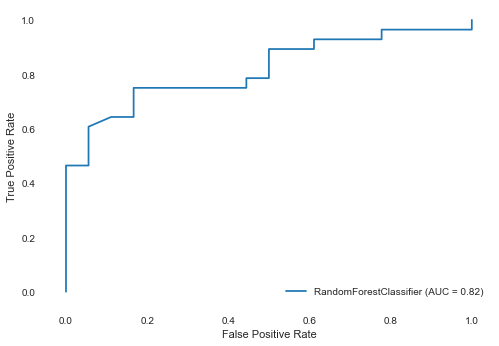

In [117]:
plot_roc_curve(estimator = classifier_rf, X= X_test, y = y_test)

In [118]:
# another method to plot a ROC curve

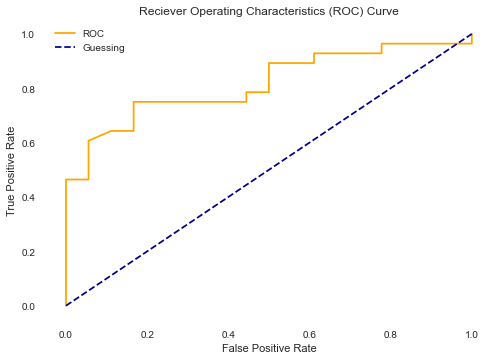

In [119]:
# Make predictions with probabilities
y_probs = classifier_rf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

def plot_roc_curve_fun(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color = 'darkblue', linestyle = '--', label = 'Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve_fun(fpr, tpr)

The maximum ROC AUC score you can achieve is 1.0 and generally,
the closer to 1.0, the better the model.

In [120]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs)

0.816468253968254

The most ideal position for a ROC curve to run along the top left corner of the plot. 
This would mean the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0.
You can see this by creating a ROC curve using only the y_test labels.

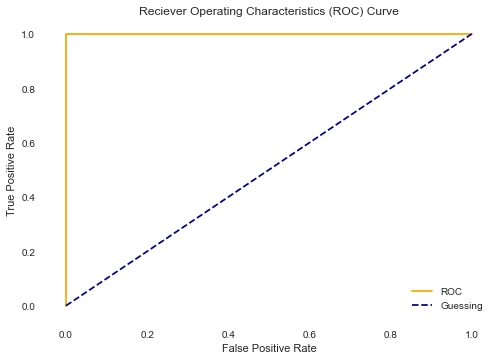

1.0

In [121]:
# plot perfect ROC curve using y_test same time
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve_fun(fpr, tpr)
# perfect ROC AUC score
roc_auc_score(y_test, y_test) # 1.0 : In reality, a perfect ROC curve is unlikely.


***************************************************************************

# cross-validation
We can calculate various evaluation metrics using cross-validation

using Scikit-Learn's cross_val_score() function along with the scoring parameter.

In [122]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# By default cross_val_score returns 5 values (cv = 5)

cross_val_acc = cross_val_score(classifier_rf,
                               X,
                               y,
                               scoring = "accuracy",
                               cv = 5)


In [123]:
cross_val_acc

array([0.83783784, 0.78378378, 0.64864865, 0.61111111, 0.86111111])

In [124]:
# find overall accuracy using mean()
cross_val_acc = cross_val_acc.mean()
cross_val_acc

0.7484984984984985

In [125]:
# Find the cross-validated precision
cross_val_precision = np.mean(cross_val_score(classifier,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

0.8305368906455863

In [126]:
# Find the cross-validated recall
cross_val_recall = np.mean(cross_val_score(classifier,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

0.8363333333333334

In [127]:
# Find the cross-validated F1 score
cross_val_f1 = np.mean(cross_val_score(classifier,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

0.8218582375478928

# Drawing special graph for Algorithm comparison

In [128]:
# it specially for drawing special graph for comparing accuracy,presion
# recall, f1_score of specific model together to other model
from sklearn.metrics import accuracy_score

In [129]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


In [130]:
# creating baseline matrics
# Make predictions
# random forest with trees 10
# classifier from GridSearchCV
y_pred = classifier.predict(X_test)

baseline_metrics = evaluate_preds(y_test, y_pred)
baseline_metrics
#*************************************************************************



Acc: 71.74%
Precision: 0.76
Recall: 0.79
F1 score: 0.77


{'accuracy': 0.72, 'precision': 0.76, 'recall': 0.79, 'f1': 0.77}

In [131]:
classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [132]:
# Helper function for plotting feature importance
import seaborn as sns

def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")
    


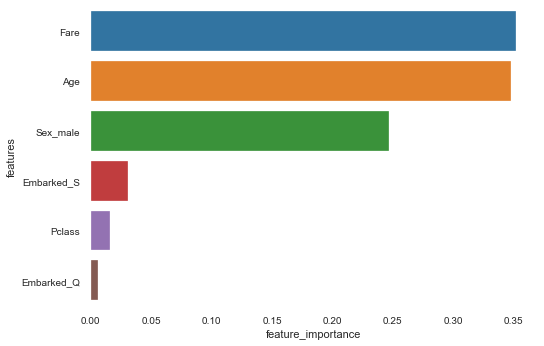

In [133]:
plot_features(X.columns, classifier.feature_importances_)

In [134]:
sum(classifier.feature_importances_)

1.0

In [135]:
# Create a second classifier
# RandomForest with trees 100
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)
# Make predictions
y_preds_2 = clf_2.predict(X_test)
# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_test, y_preds_2)
clf_2_metrics

Acc: 69.57%
Precision: 0.73
Recall: 0.79
F1 score: 0.76


{'accuracy': 0.7, 'precision': 0.73, 'recall': 0.79, 'f1': 0.76}

In [136]:
clf_2

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
# create third classifier with Logistic regression

classifier_log_reg.fit(X_train, y_train)

y_pred_log_reg =  classifier_log_reg.predict(X_test)

logistic_metrics = evaluate_preds(y_test, y_pred_log_reg )
logistic_metrics

Acc: 71.74%
Precision: 0.78
Recall: 0.75
F1 score: 0.76


{'accuracy': 0.72, 'precision': 0.78, 'recall': 0.75, 'f1': 0.76}

In [138]:
# create fourth classifier with KNN

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_metrics = evaluate_preds(y_test, y_pred_knn)
knn_metrics

Acc: 63.04%
Precision: 0.64
Recall: 0.89
F1 score: 0.75


{'accuracy': 0.63, 'precision': 0.64, 'recall': 0.89, 'f1': 0.75}

In [139]:
# create fifth classifier with SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_metrics = evaluate_preds(y_test, y_pred_svc)
svc_metrics

Acc: 60.87%
Precision: 0.61
Recall: 1.00
F1 score: 0.76


{'accuracy': 0.61, 'precision': 0.61, 'recall': 1.0, 'f1': 0.76}

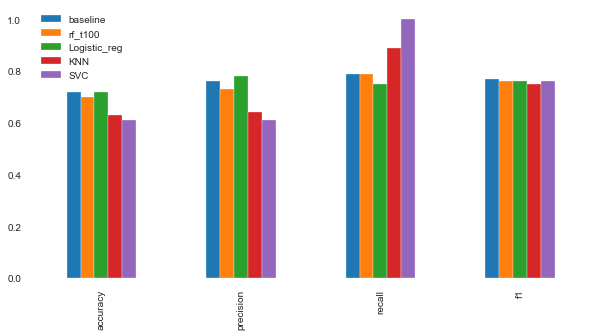

In [141]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "rf_t100" : clf_2_metrics,
                                "Logistic_reg" : logistic_metrics,
                                "KNN" : knn_metrics,
                                "SVC" : svc_metrics
                                })

compare_metrics.plot.bar(figsize = (10, 5))

RandomForestClassifier with 20 (baseline) trees and RandomForestClassifier with 100 trees gives best accuracy.

RandomForestClassifier with 20 tress (baseline) gives best precision score.

so we go through with baseline model that is RandomForestClassifier with 20 tress.



# Exporting and importing a trained model

Once you've trained a model, you may want to export it and save it to file so you can share it or use it elsewhere.

One method of exporting and importing models is using the joblib library.

In Scikit-Learn, exporting and importing a trained model is known as model persistence.

In [142]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

In [143]:
# use the dump function to export the trained model to file
dump(classifier, 'trained-classifier.joblib')

['trained-classifier.joblib']

In [144]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_clf = load("trained-classifier.joblib")

In [145]:
# Evaluate the loaded trained model on the test data
loaded_clf.score(X_test, y_test)

0.717391304347826